# Regresiones lineales 


IMPORTACIÓN DE DATOS: prueba

El sep indica separación por espacios.
El nombre de las columnas no está en los datos, por lo que agregamos respectivamente el nombre de las columnas (los nombres están en un txt separado en la página original).
Variable a predecir: MEDV (mediana de los valores en lsa casas en miles de dólares).
Luego miramos las primeras 5 líneas. 

In [21]:
import pandas as pd
df = pd.read_csv('housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Entendiendo los datos
La regresión lineal se basa altamente en correlaciones por visualizamos los siguientes gráficos de dispersión:

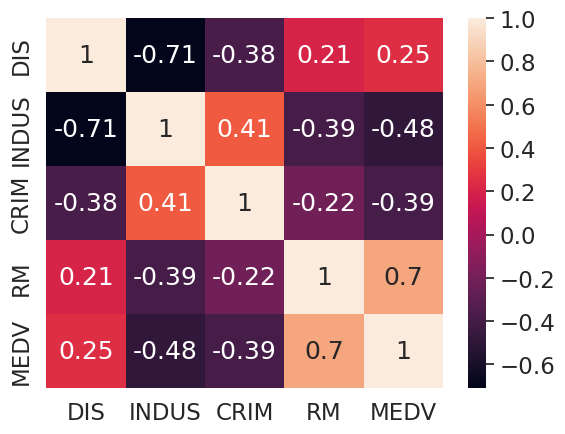

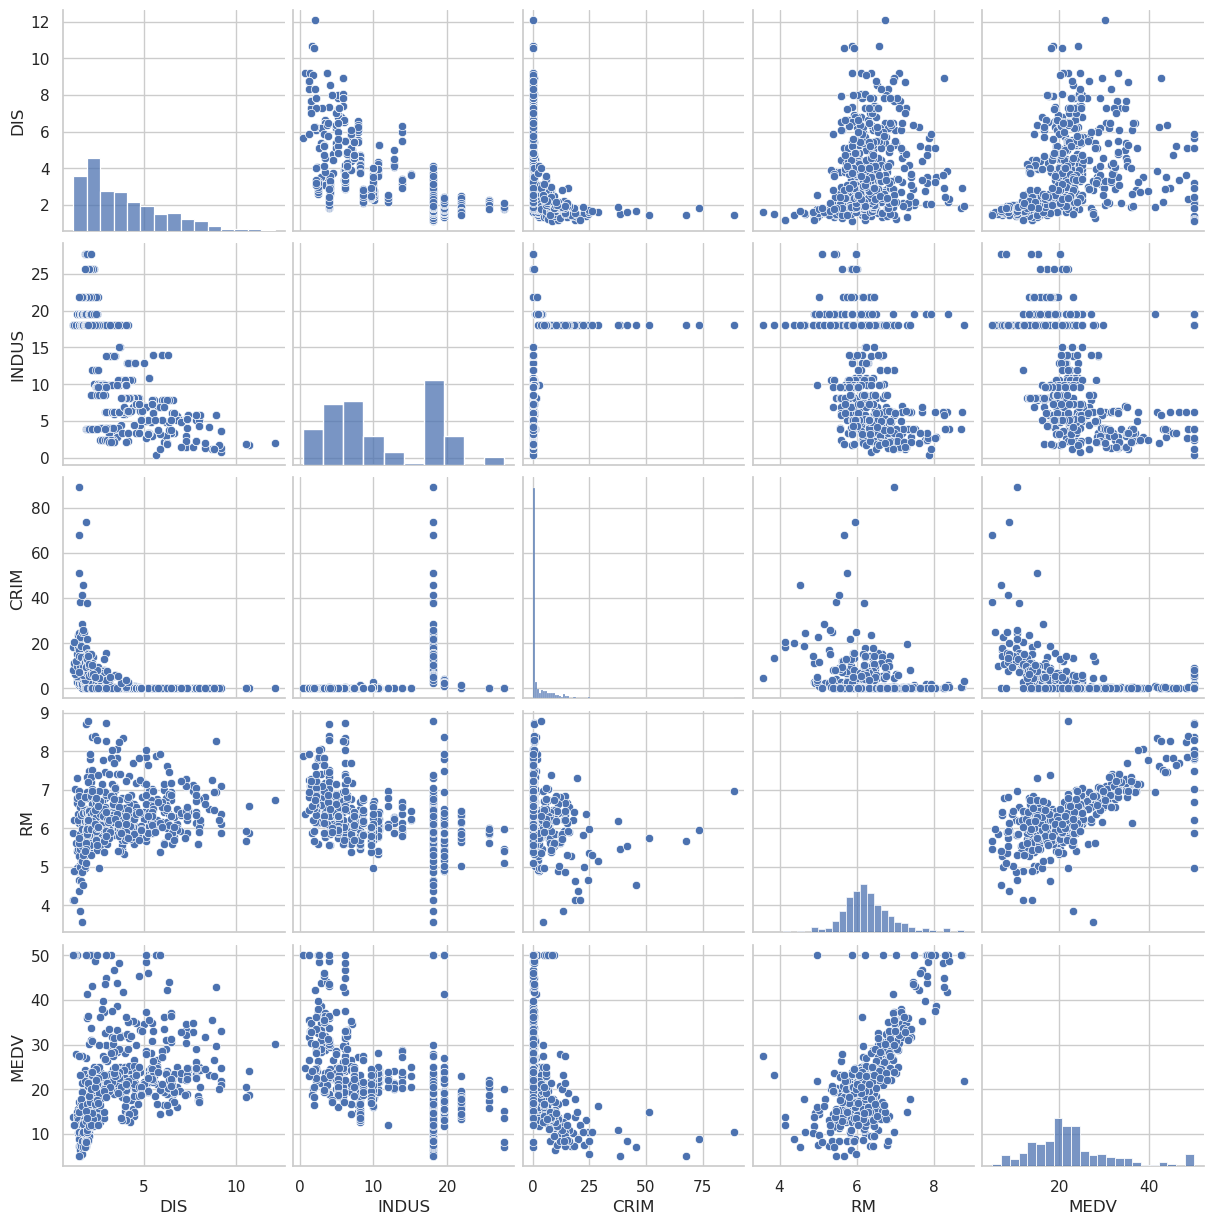

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
#estilo de gráficos: 
sns.set(style='whitegrid', context='notebook')
#variables a estudiar: 
cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV']
#creamos el gráfico y especificamos tamaño: 
sns.pairplot(df[cols], height=2.5)
plt.show()

#Por alguna razón el heatmap se muestra aquí, pero el código es el que sigue a los gráficos de dispersión. 

Necesitamos buscar variables que se correlaciones con MEDV, que será nuestra variable tarjet a predecir. Se relaciona con RM. Este análisis visual tiene que complementarse con un análisis numérico. 

Análisis numérico de las correlaciones: Realizamos un heat map. 
-Creamos una matriz de correlación (cm) y sacamos el coeficiente de correlación de las columnas que queremos utilizar. 
-A los valores de cols le aplicamos una transpuesta (T): acomoda los datos para que np pueda leerlos bien. 
-En el mapa de calor vemos la alta correlación entre EM y MEDV, en un valor de 0,7.

In [23]:
import numpy as np

cm = np.corrcoef(df[cols].values.T)
#cambio de tamaño de la fuente: 
sns.set(font_scale=1.5)
#Crea el mapa y le damos valores: cbar crea una barra lateral.
sns.heatmap(cm, annot=True,yticklabels=cols,xticklabels=cols)

<AxesSubplot:>

## Creando el modelo con scikit-learn

Una vez determinamos nuestra variable que más se relaciona con nuestra variable tarjet, creamos el modelo. 


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values.reshape(-1, 1)

sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)

LinearRegression()

## Análisis de resultados

In [25]:
plt.scatter(X_std,y_std)
plt.plot(X_std,slr.predict(X_std), color='R')
plt.ylabel("Mediana del precio de las casas en miles [MEDV]")
plt.xlabel("Promedio de habitaciones [RM]")

ValueError: 'R' is not a valid value for color

## Generando predicción con el modelo

In [ ]:
num_habitaciones = 5
num_habitaciones_std = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))
print("El precio de una casa con 5 habitaciones en Boston es de ", sc_y.inverse_transform(slr.predict(num_habitaciones_std)))

el precio de una casa con 5 habitaciones en boston es de  [[10.83992413]]
